# Sales Data Analysis

Ref: [**Solving real world data science tasks with Python Pandas!**](https://www.youtube.com/watch?v=eMOA1pPVUc4&list=TLPQMTMwNjIwMjK5QqM1BEfX3w&index=6)

DataSet: In the "**Sales_Data**" directory. 

[ NB ] : The sales data contains all the sales around 12-months in 12 separate CSV files. Thus those individual files are initially **merged altogether** before starting any further analysis.

In [1]:
# Import the required libraries
import pandas as pd, numpy as np

### Merge multiple dataset into one single dataset

<br/>

**Process**
+ Enlist all the file-directories into a list using list-comprehension.
+ Create an empty dataframe.
+ Iterate through the file-list to read each dataset & store that into a variable.
+ Concatenate each dataframe with the newly created empty dataframe.

In [2]:
# list out the file directories using the "os.listdir(directoryName)"
import os
files = [file for file in os.listdir("Sales_Data")]

# Create an empty dataframe
all_months_data = pd.DataFrame()

# Reading all the datasets through the for-loop; 
# then concatenate each dataset into the new dataframe
for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    ##### Which dataframe will concat with which dataframe #####
    all_months_data = pd.concat([all_months_data, df])

In [3]:
all_months_data.shape

(186850, 6)

In [4]:
# export the the large CSV into the physical storage
# store that without the index-column
all_months_data.to_csv("Sales_Data_all.csv", index=False)

In [5]:
# Read the newly exported dataframe
df = pd.read_csv("Sales_Data_all.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.dtypes
# Output: All the dataframe columns are of string, thus displaying as "object".

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [7]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [8]:
df.shape

(186850, 6)

## **Ques-1**: What was the best month for sales of the year? How much money was earned in that month?

In [9]:
df["Order Date"].isna().sum()

545

In [10]:
len(df)

186850

In [11]:
len(df) - df["Order Date"].isna().sum()

186305

> **Question**: How to view all the rows where the "**Order Date**" is "**NaN**"?

In [12]:
df[df["Order Date"].isna()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Drop the rows containing "NaN" values
df_dropna = df.dropna()

In [14]:
len(df) - len(df_dropna)

545

In [15]:
df_dropna.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
df_dropna.head(40)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215"


In [17]:
# Create a new column named "Month" to extract the month from the "Order Date"
# Simultaneously assign the month from each "Order Date"
df_dropna["Month"] = df_dropna["Order Date"].str[:2]

C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/4019459611.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna["Month"] = df_dropna["Order Date"].str[:2]


In [18]:
df_dropna.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [19]:
# To display the error: The month column contains some rows with "Or" string.
# Thus, we should drop the "Or" string.
df_dropna["Month"] == df_dropna["Month"].astype("int32")

# Output: This gives an error, since the "Month" column contains some "Or" string as values

ValueError: invalid literal for int() with base 10: 'Or'

In [25]:
# Find out the rows containing 'Or' string inside the "Month" column
df_dropna[df_dropna["Month"] == "Or"]

# [ Output ]: 355 rows containing "Or" in the month column.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [26]:
# Get the indicies of the rows which contains "Or" in the "Or" column

# View the type of the data which returns the index
print(type(df_dropna[df_dropna["Month"] == "Or"].index))
# Display the list of index
df_dropna[df_dropna["Month"] == "Or"].index

<class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([   519,   1149,   1155,   2878,   2893,   3036,   3209,   3618,
              4138,   4645,
            ...
            183808, 184489, 184666, 184779, 185118, 185164, 185551, 186563,
            186632, 186738],
           dtype='int64', length=355)

Drop a row (of dataframe) by index
> Syntax:  **df.drop([0, 1])**

In [27]:
# Get the indexes of rows where the "Month" column contain "Or"
df_month_or_index = df_dropna[df_dropna["Month"] == "Or"].index
# Drop the rows by passing the index as a list inside the "df.drop()" func
df_drop_or = df_dropna.drop(df_month_or_index, axis="index")
df_drop_or.head(n=40)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",04
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",04
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",04
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",04
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",04


### Converting dataframe column into different datatypes:
+ **Method-1**: using "**df.astype()**"
    + "df.astype(datatype)"
    + "df[Series].astype(datatype)"
    + "df[Series1, Series2].astype([datatype1, datatyp2])"

[ NB ]: Require to define explicitly into a specific datatype

<br/>

+ **Method-2**: 
    + using **pandas.to_numeric(dataframe[ColumnName])**
        + _pandas.to_numeric(dataframe[ColumnName1, ColumnName2])_
    + uisng **pandas.to_datetime()**
        + _pandas.to_datetime(dataframe[ColumnName1, ColumnName2])_
    + using **pandas.to_timedelta()**
        + _pandas.to_timedelta(dataframe[ColumnName1, ColumnName2])_

[ NB ]: The func will dynamically convert the appropriate numeric type (float, int)

In [28]:
# Convert each value from the "Month" series as Integer.
df_drop_or["Month"] = df_drop_or["Month"].astype("int32")

In [29]:
# Find out the type of "Price Each" column-values from the first 10 rows
for i in df_drop_or["Price Each"][:10]:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [30]:
# Convert the "Quantity Ordered" & "Price Each" columns into numeric types (int & float)
# Use the "pd.to_numeric()" 
df_drop_or["Quantity Ordered"] = pd.to_numeric(df_drop_or["Quantity Ordered"])
df_drop_or["Price Each"] = pd.to_numeric(df_drop_or["Price Each"])

In [31]:
df_drop_or.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [32]:
# Create a "Sales" column containing the product of "Quantity Ordered" & "Price Each"
df_drop_or["Sales"] = df_drop_or["Quantity Ordered"] * df_drop_or["Price Each"]
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [33]:
# Sum up the total sales of each month using the "groupby()" method
df_sales_monthly = df_drop_or.groupby("Month").sum()
df_sales_monthly.sort_values("Sales", ascending=False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


### Visualize the aggregated data

In [34]:
df_sales_monthly.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


In [35]:
list(df_sales_monthly.index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

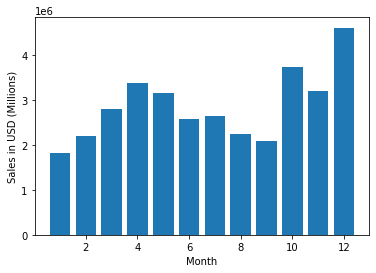

In [36]:
import matplotlib.pyplot as plt

X = list(df_sales_monthly.index)
y = df_sales_monthly["Sales"]

fig, ax = plt.subplots()
ax.bar(X, y)
plt.xlabel("Month")
plt.ylabel("Sales in USD (Millions)")
ax.plot()
plt.show()

> Which city has the highest month of sales?

In [37]:
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [38]:
x = "Hellow, world"
x.split(",")

['Hellow', ' world']

In [39]:
# Create a new column which will contain the cities
df_drop_or["City"] = df_drop_or['Purchase Address'].apply(lambda x: x.split(",")[1].split(" ")[1])
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los


In [40]:
# View the counts of the all the cities throughout the dataframe.
# It also depict that the "City" column doesn't contain any other values than the city values.
df_drop_or['City'].value_counts()

San         44732
Los         29605
New         24876
Boston      19934
Atlanta     14881
Dallas      14820
Seattle     14732
Portland    12465
Austin       9905
Name: City, dtype: int64

In [41]:
# Create a func that will extract the State names from the "Purchase Address" column
def extract_state(x):
#     return x.split(",")[2]  # Output (first row value): ' TX 75001'
#     return x.split(",")[2].split(" ")  # Output: ['', 'StateName', 'Postal Code']
    return x.split(",")[2].split(" ")[1]  # Output: ['', 'StateName', 'Postal Code']


df_drop_or['State'] = df_drop_or['Purchase Address'].apply(extract_state)
# df_drop_or["State"] = df_drop_or["State"][0].split(" ")[1]  # testing: check the split of the first row-value
# df_drop_or["State"][0]
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los,CA


In [42]:
# Create a new column; Concat all the "State" with the City enclosed with parenthesis
# df_drop_or['CIty & State'] = f"{df_drop_or['City']} + {df_drop_or['State']}"
# df_drop_or["City & State"] = pd.concat(["City", "State"], axis=1)
# df_drop_or["City & State"] = df_drop_or["City"].str.cat(df_drop_or["State"])

# df_drop_or.drop('City & State', axis=1, inplace=True) # remove the "City & State" column permanently
df_drop_or['City & State'] = df_drop_or['City'] +' ('+ df_drop_or['State'] + ')'

# df1['state_and_code'] = df1['State'] +' '+ df1['State_code']
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City & State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los,CA,Los (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)


In [43]:
df_drop_or["City"][0]

'Dallas'

In [44]:
# Aggregate the numeric columns just to find out the summation of each month's sales throughout the entire dataset
df_sales_city = df_drop_or.groupby("City & State").sum()
df_sales_city

,Quantity Ordered,Price Each,Month,Sales
City & State,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los (CA),33289,5421435.23,208325,5452570.80
New (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San (CA),50239,8211461.74,315520,8262203.91


In [45]:
# View the maximum sales-month throughtout the 12 months round
df_sales_city.sort_values("Sales", ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City & State,,,,
San (CA),50239,8211461.74,315520,8262203.91
Los (CA),33289,5421435.23,208325,5452570.80
New (NY),27932,4635370.83,175741,4664317.43
Boston (MA),22528,3637409.77,141112,3661642.01
Atlanta (GA),16602,2779908.20,104794,2795498.58
Dallas (TX),16730,2752627.82,104620,2767975.40
Seattle (WA),16553,2733296.01,104941,2747755.48
Portland (OR),11303,1860558.22,70621,1870732.34
Austin (TX),11153,1809873.61,69829,1819581.75


In [46]:
# View the indicies of the aggregated dataset
list(df_sales_city.index)

['Atlanta (GA)',
 'Austin (TX)',
 'Boston (MA)',
 'Dallas (TX)',
 'Los (CA)',
 'New (NY)',
 'Portland (ME)',
 'Portland (OR)',
 'San (CA)',
 'Seattle (WA)']

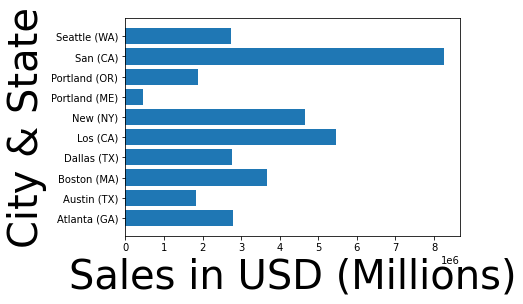

In [47]:
import matplotlib.pyplot as plt

X = df_sales_city.index
y = df_sales_city["Sales"]

fig, ax = plt.subplots()
ax.barh(X, y)  # Display the bar chart horizontally
# plt.rcParams["figure.figsize"] = (30,30)
# change the fontsize of the xtick and ytick labels
# plt.rc('xtick', labelsize=30)
# plt.rc('ytick', labelsize=30)
# Define the labels of the two axis
plt.xlabel("Sales in USD (Millions)", size=40, color="k")
# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.ylabel("City & State", size=40, color="k")
ax.plot()
plt.show()

## **Ques-2**: What time should we advertise for maximizing the likelihood of customer's buiying product?

In [48]:
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City & State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los,CA,Los (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)


In [49]:
# View the data-types of each column of the dataset
df_drop_or.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
City                 object
State                object
City & State         object
dtype: object

In [50]:
# Convert the "Order Date" column-values from string into datetime format
df_drop_or["Order Date"] = pd.to_datetime(df_drop_or['Order Date'])
df_drop_or.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Sales                      float64
City                        object
State                       object
City & State                object
dtype: object

In [51]:
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City & State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los,CA,Los (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA)


In [52]:
# Create "Hour" & "Minute" columns extracted from the "Order Date" column; 
# because the "Order Date" column is converted into Datetime-format
df_drop_or["Hour"] = df_drop_or["Order Date"].dt.hour
df_drop_or["Minute"] = df_drop_or["Order Date"].dt.minute
df_drop_or.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,City & State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los,CA,Los (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los,CA,Los (CA),9,27


In [53]:
# Aggregate the dataset using the "groupby()" func on the "Hour" column; it'll calculate the total sales based on the 24-hour thorughout the day;
df_hour_sales = df_drop_or.groupby("Hour").sum()
df_hour_sales.sort_values('Sales', ascending=False)

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
19,14470,2398588.31,91389,2412938.54,381042
12,14202,2299876.68,89161,2316821.34,368679
11,14005,2288855.18,87654,2300610.24,368952
20,13768,2268185.16,86375,2281716.24,354086
18,13802,2207696.93,86421,2219348.30,371688
13,13685,2139743.86,85808,2155389.80,351045
17,12229,2116777.02,77454,2129361.61,323428
14,12362,2072194.77,77836,2083672.73,322563
21,12244,2030763.83,77103,2042000.86,312062


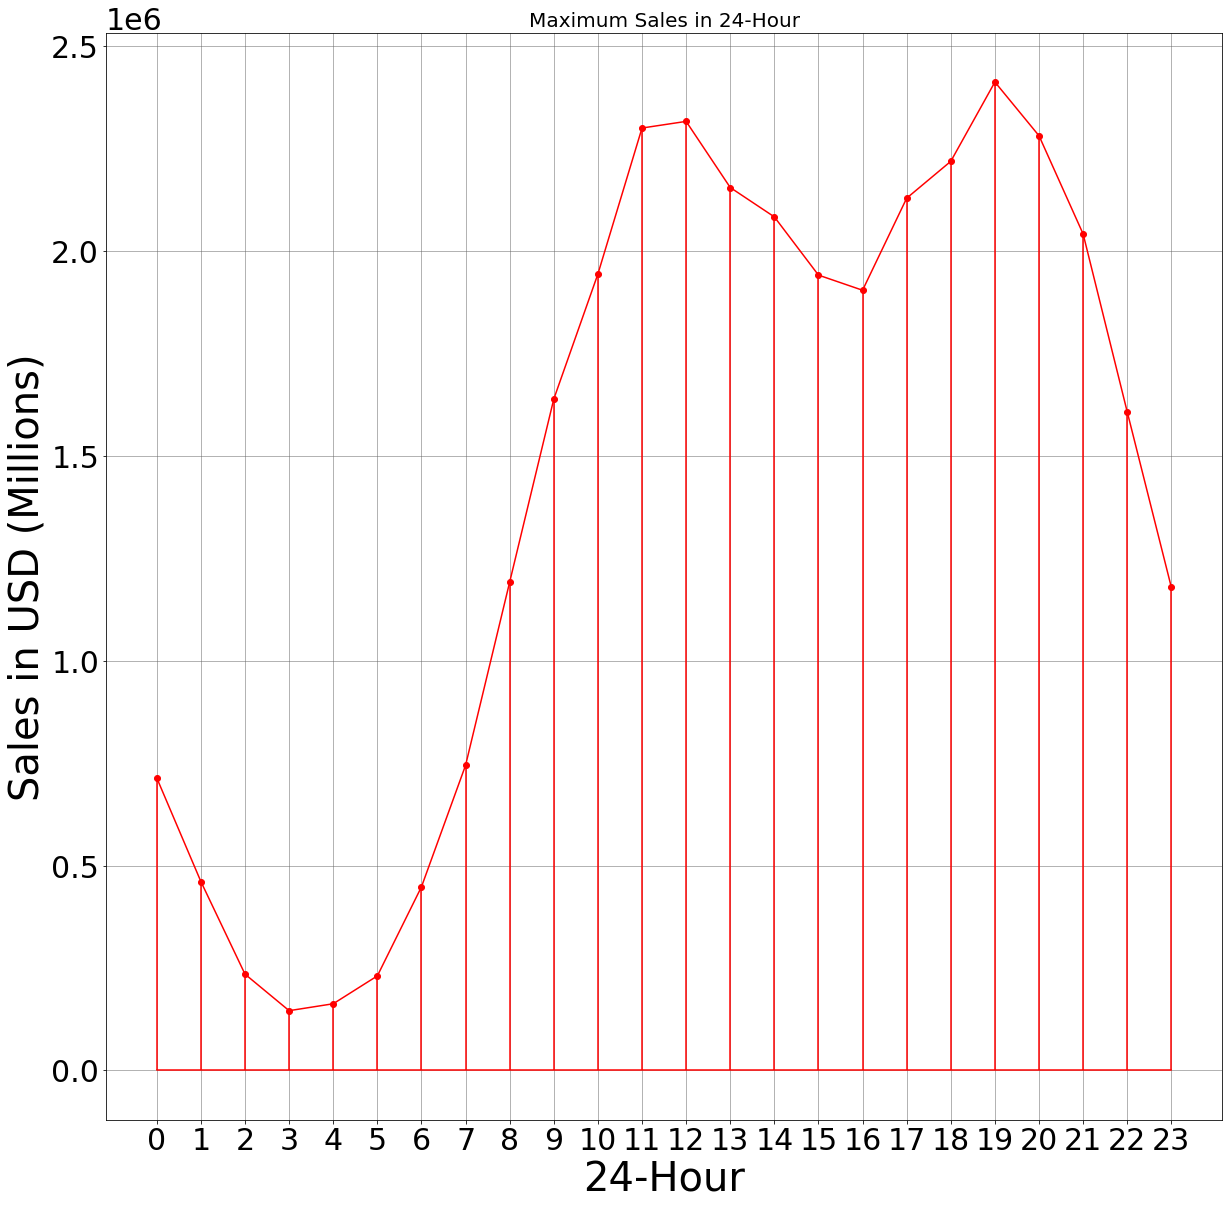

In [190]:
# Visualize the aggregated dataset based on the hourly sales
# Uisng the "Stem Chart" to make better visualization of each xticks corresponding in the chart.
# Make griding in the background, to make better pointing in the chart.
import matplotlib.pyplot as plt
import numpy as np

X = df_hour_sales.index
y = df_hour_sales["Sales"]

fig, ax = plt.subplots()
# ax.barh(X, y)  # Display the bar chart horizontally
plt.rcParams["figure.figsize"] = (20,20)
plt.title("Maximum Sales in 24-Hour", fontsize=20)
# change the fontsize of the xtick and ytick labels
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)
# # Define the labels of the two axis
plt.xlabel("24-Hour", size=40, color="k")
# # plt.xticks(rotation=90)
# # plt.yticks(rotation=90)
plt.ylabel("Sales in USD (Millions)", size=40, color="k")
# ax.plot()
# plt.show()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='dimgrey')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='orange')

plt.xticks(X)
stemlines = plt.stem(X, y)
# (markers, stemlines, baseline) = plt.stem(values)
plt.setp(stemlines, linestyle="-", color="r", linewidth=1.5 )
plt.show()

## **Ques-3**: What products are most often sold together?

+ Look at the "**Order ID**" to inspect which products are sold together; Also, view their corresponding "Purchase Address" of those orders.

In [55]:
df_dropna.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


### View the duplicate products based on the "Order ID" column

> Use the "**Series.groupby()**" method

In [56]:
# [ TESTING ] Only returns the first duplicate occurances among the dataset
print("First duplicate occurances total:", df_dropna["Order ID"].duplicated(keep="first").sum())
df_dropna["Order ID"].duplicated(keep="first")

First duplicate occurances total: 7867


0         False
2         False
3         False
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 186305, dtype: bool

In [57]:
# [ TESTING ] Only returns the last duplicate occurances among the dataset
print("Last duplicate occurances total:", df_dropna["Order ID"].duplicated(keep="last").sum())
df_dropna["Order ID"].duplicated(keep="last").sum()

Last duplicate occurances total: 7867


7867

In [58]:
# [ TESTING ] Only returns the all duplicate occurances among the dataset
print("All duplicate occurances total:", df_dropna["Order ID"].duplicated(keep=False).sum())
df_dropna["Order ID"].duplicated(keep=False)

All duplicate occurances total: 15004


0         False
2         False
3          True
4          True
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Name: Order ID, Length: 186305, dtype: bool

In [59]:
# Total length of the original dataset
df_dropna.__len__()

186305

In [60]:
# Differences between the original & the duplicate dataset (with all duplicates)
df_dropna.__len__() - dups

NameError: name 'dups' is not defined

In [63]:
# View all the rows which have duplicate "Order ID"
df_duplicates = df_dropna[df_dropna["Order ID"].duplicated(keep=False)]
df_duplicates.head(n=50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04
33,176586,Google Phone,1,600,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",04
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",04
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",04


In [64]:
# Dymestifying the "dataframe.groupby("Order ID")["Product"] func

# Store the rows of a dataframe which containing duplicate "Order ID"
# grouped = df_duplicates.groupby("Order ID")
# Store only the values from "Product" column of a dataframe which containing duplicate "Order ID"
grouped = df_duplicates.groupby("Order ID")["Product"]

print(type(grouped))

# g = None
# name= index after grouping-by;  group= the values of after grouping-by
for name, group in grouped:
    print("-"*10, name, "-"*10)
    print(group)
    print("#"*50)
#     g = dir(group)
#     break
# g

<class 'pandas.core.groupby.generic.SeriesGroupBy'>
---------- 141275 ----------
67588    USB-C Charging Cable
67589        Wired Headphones
Name: Product, dtype: object
##################################################
---------- 141290 ----------
67604    Apple Airpods Headphones
67605       AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 141365 ----------
67680     Vareebadd Phone
67681    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 141384 ----------
67700            Google Phone
67701    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 141450 ----------
67767                  Google Phone
67768    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 141457 ----------
67775                      iPhone
67776    Apple Airpods Headp

Name: Product, dtype: object
##################################################
---------- 144866 ----------
71379                      iPhone
71380    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 144884 ----------
71398        20in Monitor
71399    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 144900 ----------
71415     AA Batteries (4-pack)
71416    27in 4K Gaming Monitor
Name: Product, dtype: object
##################################################
---------- 144930 ----------
71446              iPhone
71447    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 144942 ----------
71459               Vareebadd Phone
71460    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 145019 ----------
71537            Google Phone
71538   

Name: Product, dtype: object
##################################################
---------- 149731 ----------
76461       AA Batteries (4-pack)
76462    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 149738 ----------
76469    USB-C Charging Cable
76470    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 149773 ----------
76505    Wired Headphones
76506    27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 149812 ----------
76545    Lightning Charging Cable
76546               Flatscreen TV
Name: Product, dtype: object
##################################################
---------- 149857 ----------
76591                      iPhone
76592    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 149894 ----------
76629            Google Phone


##################################################
---------- 154375 ----------
59575                      iPhone
59576    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 154417 ----------
59619                      iPhone
59620    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 154471 ----------
59675        Google Phone
59676    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 154511 ----------
59716    Bose SoundSport Headphones
59717              27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 154524 ----------
59730                      iPhone
59731    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 154576 ----------
59783            Google Phone
59784    USB-C Ch

Name: Product, dtype: object
##################################################
---------- 159396 ----------
64829            Google Phone
64830    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 159466 ----------
64900    USB-C Charging Cable
64901        27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 159517 ----------
64952                      iPhone
64953    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 159543 ----------
64979        USB-C Charging Cable
64980    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 159568 ----------
65005            Google Phone
65006    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 159611 ----------
65049    Lightning Charging Ca

Name: Product, dtype: object
##################################################
---------- 164713 ----------
108105                  Google Phone
108106    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 164717 ----------
108110     AA Batteries (4-pack)
108111    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 164737 ----------
108131            Google Phone
108132    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 164750 ----------
108145    34in Ultrawide Monitor
108146     AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 164755 ----------
108151            Google Phone
108152    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 164759 ----------
108156          

---------- 168938 ----------
112520                      iPhone
112521    Lightning Charging Cable
112522            Wired Headphones
Name: Product, dtype: object
##################################################
---------- 169022 ----------
112606            Google Phone
112607    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 169076 ----------
112663    Apple Airpods Headphones
112664       AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 169116 ----------
112704    Bose SoundSport Headphones
112705      Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 169160 ----------
112749    Vareebadd Phone
112750    ThinkPad Laptop
Name: Product, dtype: object
##################################################
---------- 169167 ----------
112757            Google Phone
112758    USB-C Charging Cable
N

Name: Product, dtype: object
##################################################
---------- 171806 ----------
115512                      iPhone
115513    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 171825 ----------
115532                      iPhone
115533    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 171843 ----------
115551                  Google Phone
115552    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 171896 ----------
115606         Vareebadd Phone
115607    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 171904 ----------
115615      27in 4K Gaming Monitor
115616    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 171912 ----------


Name: Product, dtype: object
##################################################
---------- 174873 ----------
118733         Vareebadd Phone
118734    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 174930 ----------
118792                      iPhone
118793    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 174932 ----------
118796                  Google Phone
118797    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 174933 ----------
118798            Wired Headphones
118799    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 174972 ----------
118838    USB-C Charging Cable
118839    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 174976 ----------
118843  

---------- 178749 ----------
2292                      iPhone
2293    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 178781 ----------
2325        Google Phone
2326    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 178825 ----------
2370                      iPhone
2371    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 178886 ----------
2432        Google Phone
2433    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 178954 ----------
2501            Google Phone
2502    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 178989 ----------
2537         Vareebadd Phone
2538    USB-C Charging Cable
Name: Product, dtype: object
#################################################

Name: Product, dtype: object
##################################################
---------- 182147 ----------
5849         Vareebadd Phone
5850    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 182158 ----------
5861    Bose SoundSport Headphones
5862               ThinkPad Laptop
Name: Product, dtype: object
##################################################
---------- 182168 ----------
5872       AA Batteries (4-pack)
5873    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 182176 ----------
5881     USB-C Charging Cable
5882    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 182215 ----------
5921              27in FHD Monitor
5922    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 182240 ----------
5947                  

---------- 186271 ----------
10175          Vareebadd Phone
10176    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 186284 ----------
10189                      iPhone
10190    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 186288 ----------
10194              iPhone
10195    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 186331 ----------
10238    AAA Batteries (4-pack)
10239    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 186362 ----------
10271            Wired Headphones
10272    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 186370 ----------
10280            Google Phone
10281    USB-C Charging Cable
Name: Product, dtype: object
#######################

Name: Product, dtype: object
##################################################
---------- 190196 ----------
14301         Vareebadd Phone
14302    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 190211 ----------
14317         Vareebadd Phone
14318    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 190218 ----------
14325            Google Phone
14326    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 190228 ----------
14336    AA Batteries (4-pack)
14337     USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 190255 ----------
14364               Vareebadd Phone
14365    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 190300 ----------
14410              iPhone
14411 

Name: Product, dtype: object
##################################################
---------- 193276 ----------
17517          USB-C Charging Cable
17518    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 193324 ----------
17566    Apple Airpods Headphones
17567      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 193349 ----------
17592    USB-C Charging Cable
17593         Vareebadd Phone
Name: Product, dtype: object
##################################################
---------- 193360 ----------
17604          Vareebadd Phone
17605    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 193379 ----------
17624         Vareebadd Phone
17625    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 193384 ----------
17630         Vareebadd 

Name: Product, dtype: object
##################################################
---------- 194774 ----------
121205     Vareebadd Phone
121206    27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 194780 ----------
121212        Google Phone
121213    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 194786 ----------
121219    Apple Airpods Headphones
121220      27in 4K Gaming Monitor
Name: Product, dtype: object
##################################################
---------- 194791 ----------
121225    Wired Headphones
121226        20in Monitor
Name: Product, dtype: object
##################################################
---------- 194815 ----------
121250    AA Batteries (4-pack)
121251     USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 194823 ----------
121259                      iPhone
121260    Light

---------- 197786 ----------
124371            Google Phone
124372    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 197798 ----------
124384            Google Phone
124385    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 197812 ----------
124399                      iPhone
124400    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 197813 ----------
124401    Apple Airpods Headphones
124402            27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 197841 ----------
124431    Apple Airpods Headphones
124432      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 197845 ----------
124436    USB-C Charging Cable
124437    USB-C Charging Cable
Name: Product, dtype: object
#

Name: Product, dtype: object
##################################################
---------- 199948 ----------
126653    AAA Batteries (4-pack)
126654    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 199951 ----------
126657              iPhone
126658    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 199982 ----------
126689            Google Phone
126690    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 199994 ----------
126702            Google Phone
126703    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 200071 ----------
126780     AA Batteries (4-pack)
126781    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 200079 ----------
126789    Bose SoundSport Headphones

Name: Product, dtype: object
##################################################
---------- 202765 ----------
129618                      iPhone
129619    Lightning Charging Cable
129620        USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 202783 ----------
129638         Flatscreen TV
129639    Macbook Pro Laptop
Name: Product, dtype: object
##################################################
---------- 202811 ----------
129667    Apple Airpods Headphones
129668            Wired Headphones
Name: Product, dtype: object
##################################################
---------- 202842 ----------
129699        Wired Headphones
129700    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 202906 ----------
129764          20in Monitor
129765    Macbook Pro Laptop
Name: Product, dtype: object
##################################################
---------- 202910 ----

Name: Product, dtype: object
##################################################
---------- 205770 ----------
132767              iPhone
132768    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 205778 ----------
132776               Vareebadd Phone
132777          USB-C Charging Cable
132778    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 205783 ----------
132783         Vareebadd Phone
132784    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 205791 ----------
132792                      iPhone
132793    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 205801 ----------
132803      AAA Batteries (4-pack)
132804    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
--------

Name: Product, dtype: object
##################################################
---------- 208401 ----------
135521                      iPhone
135522    Lightning Charging Cable
135523    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 208404 ----------
135526      AAA Batteries (4-pack)
135527    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 208408 ----------
135531    AA Batteries (4-pack)
135532             Google Phone
Name: Product, dtype: object
##################################################
---------- 208451 ----------
135575            Google Phone
135576    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 208493 ----------
135618    Apple Airpods Headphones
135619        USB-C Charging Cable
Name: Product, dtype: object
##################################################
----

Name: Product, dtype: object
##################################################
---------- 211094 ----------
92873    AAA Batteries (4-pack)
92874     AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 211101 ----------
92881    Apple Airpods Headphones
92882        USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 211105 ----------
92886            Google Phone
92887    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 211124 ----------
92906                      iPhone
92907    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 211134 ----------
92917            Google Phone
92918    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 211186 ----------
92970          Wired Headp

---------- 213515 ----------
95425                      iPhone
95426    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 213524 ----------
95435              iPhone
95436    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 213540 ----------
95452    AAA Batteries (4-pack)
95453                    iPhone
Name: Product, dtype: object
##################################################
---------- 213546 ----------
95459            Google Phone
95460    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 213554 ----------
95468           iPhone
95469    Flatscreen TV
Name: Product, dtype: object
##################################################
---------- 213559 ----------
95474            Google Phone
95475    USB-C Charging Cable
Name: Product, dtype: object
###############################################

Name: Product, dtype: object
##################################################
---------- 216804 ----------
98871    LG Washing Machine
98872                iPhone
Name: Product, dtype: object
##################################################
---------- 216941 ----------
99009                    iPhone
99010    34in Ultrawide Monitor
Name: Product, dtype: object
##################################################
---------- 216943 ----------
99012                      iPhone
99013    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 216974 ----------
99044            Google Phone
99045    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 216976 ----------
99047                    iPhone
99048    27in 4K Gaming Monitor
Name: Product, dtype: object
##################################################
---------- 217008 ----------
99080            Google Phone
9908

Name: Product, dtype: object
##################################################
---------- 219766 ----------
101968            Google Phone
101969    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 219782 ----------
101985                      iPhone
101986    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 219818 ----------
102022            Google Phone
102023    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 219904 ----------
102110                      iPhone
102111    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 219950 ----------
102157             Flatscreen TV
102158    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 219956 ----------
102164       AA 

104659          27in FHD Monitor
104660    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 222355 ----------
104671                  Google Phone
104672    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 222375 ----------
104692    27in 4K Gaming Monitor
104693          Wired Headphones
Name: Product, dtype: object
##################################################
---------- 222379 ----------
104697    Lightning Charging Cable
104698            Wired Headphones
Name: Product, dtype: object
##################################################
---------- 222390 ----------
104709    Wired Headphones
104710        20in Monitor
Name: Product, dtype: object
##################################################
---------- 222415 ----------
104735            Google Phone
104736    USB-C Charging Cable
104737        Wired Headphones
Name: Product, dtype: object
###

Name: Product, dtype: object
##################################################
---------- 224840 ----------
79276           ThinkPad Laptop
79277    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 224862 ----------
79300         Vareebadd Phone
79301    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 224881 ----------
79320                      iPhone
79321    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 224960 ----------
79400                    iPhone
79401    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 224967 ----------
79408            Google Phone
79409    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 224994 ----------
79436    ThinkPad Laptop
79437

---------- 227565 ----------
82135    Bose SoundSport Headphones
82136          USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 227586 ----------
82157    Bose SoundSport Headphones
82158    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 227635 ----------
82207    Lightning Charging Cable
82208        USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 227661 ----------
82234        USB-C Charging Cable
82235    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 227664 ----------
82238                  Google Phone
82239    Bose SoundSport Headphones
82240              Wired Headphones
Name: Product, dtype: object
##################################################
---------- 227668 ----------
82244    Apple Airpods Headphones
8224

Name: Product, dtype: object
##################################################
---------- 230560 ----------
85274    Wired Headphones
85275        Google Phone
Name: Product, dtype: object
##################################################
---------- 230583 ----------
85298    Lightning Charging Cable
85299    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 230585 ----------
85301            Google Phone
85302    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 230598 ----------
85315                      iPhone
85316    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 230600 ----------
85318    AA Batteries (4-pack)
85319         Wired Headphones
Name: Product, dtype: object
##################################################
---------- 230605 ----------
85324         Vareebadd Phone
85325 

Name: Product, dtype: object
##################################################
---------- 234232 ----------
89101            Google Phone
89102    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 234258 ----------
89128    Lightning Charging Cable
89129    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 234289 ----------
89160         Vareebadd Phone
89161    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 234332 ----------
89204            Google Phone
89205    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 234345 ----------
89218    34in Ultrawide Monitor
89219    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 234359 ----------
89233         AA Batteries (4-pack

---------- 237584 ----------
19332            Google Phone
19333    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 237629 ----------
19378    AAA Batteries (4-pack)
19379      USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 237679 ----------
19429                      iPhone
19430    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 237692 ----------
19443            Google Phone
19444    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 237733 ----------
19485         Flatscreen TV
19486    Macbook Pro Laptop
Name: Product, dtype: object
##################################################
---------- 237751 ----------
19504    Apple Airpods Headphones
19505       AA Batteries (4-pack)
Name: Product, dtype: object
#####################

Name: Product, dtype: object
##################################################
---------- 239964 ----------
21810                      iPhone
21811    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 239968 ----------
21815            Google Phone
21816    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 240027 ----------
21875                      iPhone
21876    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 240029 ----------
21878      Macbook Pro Laptop
21879    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 240067 ----------
21917                      iPhone
21918    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 240080 ----------
21931    AAA Batteries

---------- 242355 ----------
24309    Bose SoundSport Headphones
24310                        iPhone
Name: Product, dtype: object
##################################################
---------- 242400 ----------
24355            Google Phone
24356    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 242411 ----------
24367    Bose SoundSport Headphones
24368        AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 242436 ----------
24393       Flatscreen TV
24394    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 242443 ----------
24401                      iPhone
24402    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 242507 ----------
24467    AAA Batteries (4-pack)
24468      USB-C Charging Cable
Name: Product, dtype: object
#########

27584                      iPhone
27585    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 245497 ----------
27616                      iPhone
27617    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 245551 ----------
27671    Bose SoundSport Headphones
27672                 Flatscreen TV
Name: Product, dtype: object
##################################################
---------- 245564 ----------
27685                  Google Phone
27686    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 245600 ----------
27722                  Google Phone
27723    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 245602 ----------
27725              iPhone
27726    Wired Headphones
Name: Product, dtype: object
######################

---------- 247632 ----------
29843                      iPhone
29844    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 247640 ----------
29852            27in FHD Monitor
29853    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 247646 ----------
29859        Google Phone
29860    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 247650 ----------
29864       AA Batteries (4-pack)
29865    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 247673 ----------
29888    USB-C Charging Cable
29889    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 247693 ----------
29909                      iPhone
29910    Lightning Charging Cable
Name: Product, dtype: object
#############

Name: Product, dtype: object
##################################################
---------- 250886 ----------
178018                      iPhone
178019    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 250914 ----------
178047                  Google Phone
178048    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 250975 ----------
178109    AAA Batteries (4-pack)
178110    34in Ultrawide Monitor
Name: Product, dtype: object
##################################################
---------- 250978 ----------
178113    Apple Airpods Headphones
178114       AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 250982 ----------
178118          27in FHD Monitor
178119    34in Ultrawide Monitor
Name: Product, dtype: object
##################################################
---------- 251084 ----------


---------- 256003 ----------
183353            Google Phone
183354    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 256065 ----------
183416    Bose SoundSport Headphones
183417      Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 256131 ----------
183483                20in Monitor
183484    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 256132 ----------
183485    Lightning Charging Cable
183486       AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 256177 ----------
183532            Google Phone
183533    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 256183 ----------
183539        27in 4K Gaming Monitor
183540    Bose SoundSport Headphones
Name: Product,

Name: Product, dtype: object
##################################################
---------- 261652 ----------
157192    AAA Batteries (4-pack)
157193          27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 261683 ----------
157224    Macbook Pro Laptop
157225       ThinkPad Laptop
Name: Product, dtype: object
##################################################
---------- 261693 ----------
157235        USB-C Charging Cable
157236    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 261771 ----------
157314            Google Phone
157315    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 261778 ----------
157322    27in FHD Monitor
157323     ThinkPad Laptop
Name: Product, dtype: object
##################################################
---------- 261807 ----------
157353            Google Phone
15735

##################################################
---------- 266980 ----------
162759            Wired Headphones
162760    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 266997 ----------
162777                      iPhone
162778    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 267002 ----------
162784               Vareebadd Phone
162785    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 267013 ----------
162796    Lightning Charging Cable
162797      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 267032 ----------
162816        USB-C Charging Cable
162817    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 267074 ----------
162859        Google 

##################################################
---------- 271688 ----------
167700            Google Phone
167701    USB-C Charging Cable
167702        Wired Headphones
Name: Product, dtype: object
##################################################
---------- 271691 ----------
167705       Macbook Pro Laptop
167706    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 271697 ----------
167712    Apple Airpods Headphones
167713            27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 271704 ----------
167720                      iPhone
167721    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 271727 ----------
167744     USB-C Charging Cable
167745    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 271729 ----------
167747      Li

##################################################
---------- 276240 ----------
172486    Bose SoundSport Headphones
172487        AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 276249 ----------
172496            Google Phone
172497    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 276292 ----------
172540         Vareebadd Phone
172541    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 276332 ----------
172581      Lightning Charging Cable
172582    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 276357 ----------
172607    AAA Batteries (4-pack)
172608          27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 276393 ----------
172644    AA Batteries (4-pack)
17264

Name: Product, dtype: object
##################################################
---------- 281717 ----------
140173                      iPhone
140174    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 281728 ----------
140185            Google Phone
140186    USB-C Charging Cable
140187        Wired Headphones
Name: Product, dtype: object
##################################################
---------- 281743 ----------
140202         Wired Headphones
140203    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 281850 ----------
140311    27in FHD Monitor
140312    27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 281886 ----------
140348    USB-C Charging Cable
140349    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 281961 ----------
140

---------- 286884 ----------
145580            Google Phone
145581    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 286919 ----------
145616    AA Batteries (4-pack)
145617         Wired Headphones
Name: Product, dtype: object
##################################################
---------- 286925 ----------
145623                      iPhone
145624    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 286942 ----------
145641          Google Phone
145642    Macbook Pro Laptop
Name: Product, dtype: object
##################################################
---------- 286945 ----------
145645             Flatscreen TV
145646    AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 286949 ----------
145650                      iPhone
145651    Lightning Charging Cable
Name: Product, dtype: object
#######

---------- 292280 ----------
151232                      iPhone
151233    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 292324 ----------
151277            Google Phone
151278    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 292335 ----------
151290    AA Batteries (4-pack)
151291    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 292364 ----------
151320    AA Batteries (4-pack)
151321         27in FHD Monitor
Name: Product, dtype: object
##################################################
---------- 292376 ----------
151333                      iPhone
151334    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 292417 ----------
151375        Wired Headphones
151376    USB-C Charging Cable
Name: Product, dtype: object
#####

---------- 297078 ----------
31883                      iPhone
31884    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 297164 ----------
31971       AA Batteries (4-pack)
31972    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 297165 ----------
31973    Lightning Charging Cable
31974      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 297167 ----------
31976    AAA Batteries (4-pack)
31977             Flatscreen TV
Name: Product, dtype: object
##################################################
---------- 297192 ----------
32002       AA Batteries (4-pack)
32003    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 297197 ----------
32008         Wired Headphones
32009    AA Batteries (4-pack)
Name: Product, dtype: object

Name: Product, dtype: object
##################################################
---------- 302322 ----------
37367        20in Monitor
37368    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 302332 ----------
37378                      iPhone
37379    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 302388 ----------
37435      AAA Batteries (4-pack)
37436    Apple Airpods Headphones
Name: Product, dtype: object
##################################################
---------- 302401 ----------
37450                      iPhone
37451    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 302428 ----------
37478            Google Phone
37479    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 302444 ----------
37495            Google Phone


42042                      iPhone
42043    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 306782 ----------
42051            Google Phone
42052    USB-C Charging Cable
Name: Product, dtype: object
##################################################
---------- 306787 ----------
42057              iPhone
42058    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 306846 ----------
42117                      iPhone
42118    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 306851 ----------
42123    AA Batteries (4-pack)
42124    AA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 306857 ----------
42130                      iPhone
42131    Apple Airpods Headphones
Name: Product, dtype: object
################################################

Name: Product, dtype: object
##################################################
---------- 312851 ----------
48378    Lightning Charging Cable
48379      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 312861 ----------
48389    Lightning Charging Cable
48390      AAA Batteries (4-pack)
Name: Product, dtype: object
##################################################
---------- 312867 ----------
48396                  Google Phone
48397          USB-C Charging Cable
48398    Bose SoundSport Headphones
Name: Product, dtype: object
##################################################
---------- 312926 ----------
48458                      iPhone
48459    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 312927 ----------
48460    AA Batteries (4-pack)
48461                   iPhone
Name: Product, dtype: object
##################################################
-

##################################################
---------- 318206 ----------
53985        Google Phone
53986    Wired Headphones
Name: Product, dtype: object
##################################################
---------- 318216 ----------
53996                      iPhone
53997    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 318219 ----------
54000    Bose SoundSport Headphones
54001                 Flatscreen TV
Name: Product, dtype: object
##################################################
---------- 318229 ----------
54011                      iPhone
54012    Lightning Charging Cable
Name: Product, dtype: object
##################################################
---------- 318238 ----------
54021    34in Ultrawide Monitor
54022                    iPhone
Name: Product, dtype: object
##################################################
---------- 318242 ----------
54026            Google Phone
54027    USB-C Chargi

In [65]:
df_duplicates.__len__()

15004

In [66]:
df_dropna[(df_dropna.index == 67588) | (df_dropna.index == 67589)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
67588,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01
67589,141275,Wired Headphones,1,11.99,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",01


#### View the differences on "datafrane.apply()" & "dataframe.transform()" funcs

> Ref: [**Difference between apply() and transform() in Pandas**](https://towardsdatascience.com/difference-between-apply-and-transform-in-pandas-242e5cf32705)

In [67]:
# Process:
# 1. Make granular rows uisng the "df.groupby()" func based on the "Order ID" column;
# 2. Simultaneously extract only the values of paired groups;
# 3. Use the "datafrmae.transform()" func to produce transformed-values on a specified column.

# Specify a new column inside the dataframe
df_duplicates["Grouped"] = df_duplicates.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
df_duplicates.head()

C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/2081537411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicates["Grouped"] = df_duplicates.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Grouped
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",04,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",04,"Bose SoundSport Headphones,Bose SoundSport Hea..."


## Timestamp ====> 1:07:34

In [68]:
df_duplicates.__len__()

15004

In [125]:
# Drop duplicate rows of both the "Order ID" & "Grouped" columns
# Returns only the first occurances from the duplicate-value datasets
# Store a cleaned dataframe only containing ("Order ID", "Grouped") columns; which doen't contain any duplicate rows.
df_clean = df_duplicates[["Order ID", "Grouped"]].drop_duplicates()
print("Shape of the cleaned dataset (after keeping the first occurance of the duplicates)", df_clean.shape)

# for d in df_clean.head(n=500):
#     print(d)

df_clean.iloc[15:50, :2]

# df_drop_duplicates = df_duplicates.drop_duplicates(keep="first")
# len(df_drop_duplicates)

Shape of the cleaned dataset (after keeping the first occurance of the duplicates) (7137, 2)


,Order ID,Grouped
435,176975,"USB-C Charging Cable,AAA Batteries (4-pack)"
450,176989,"Google Phone,USB-C Charging Cable"
455,176993,"iPhone,Wired Headphones"
485,177022,"iPhone,Wired Headphones"
519,Order ID,"Product,Product,Product,Product,Product,Produc..."
567,177102,"iPhone,27in 4K Gaming Monitor"
581,177115,"iPhone,Lightning Charging Cable"
584,177117,"ThinkPad Laptop,AAA Batteries (4-pack)"
635,177167,"iPhone,Apple Airpods Headphones,AAA Batteries ..."
648,177178,"iPhone,Lightning Charging Cable"


In [126]:
# find the rows where the "Grouped" column contains ["Product", "Product",..............,""]
# First, get the index of all the raows which contain "Order ID" as value in the "Order ID" column.
# Pass those indicies as a list inside the "drop()" function.



drop_row_index = df_clean[df_clean["Order ID"] == "Order ID"].index
df_clean.drop(drop_row_index, inplace=True)
df_clean.iloc[15:40, :]

,Order ID,Grouped
435,176975,"USB-C Charging Cable,AAA Batteries (4-pack)"
450,176989,"Google Phone,USB-C Charging Cable"
455,176993,"iPhone,Wired Headphones"
485,177022,"iPhone,Wired Headphones"
567,177102,"iPhone,27in 4K Gaming Monitor"
581,177115,"iPhone,Lightning Charging Cable"
584,177117,"ThinkPad Laptop,AAA Batteries (4-pack)"
635,177167,"iPhone,Apple Airpods Headphones,AAA Batteries ..."
648,177178,"iPhone,Lightning Charging Cable"
652,177181,"Wired Headphones,Apple Airpods Headphones"


In [ ]:
# Remove the row containing "Order ID" in the "Order ID" column; because that row contains anomaly instad of "Product Pair".
df_clean[""]

In [98]:
for row in df_clean['Grouped']:
    print( row )

Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable
Bose SoundSport Headphones,Bose SoundSport Headphones
AAA Batteries (4-pack),Google Phone
Lightning Charging Cable,USB-C Charging Cable
Apple Airpods Headphones,ThinkPad Laptop
Bose SoundSport Headphones,AAA Batteries (4-pack)
34in Ultrawide Monitor,Google Phone
Lightning Charging Cable,USB-C Charging Cable
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones,Wired Headphones
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Google Phone,Wired Headphones
AAA Batteries (4-pack),27in FHD Monitor
USB-C Charging Cable,AAA Batteries (4-pack)
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Wired Headphones
Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Produc

Google Phone,Wired Headphones,USB-C Charging Cable
USB-C Charging Cable,USB-C Charging Cable
iPhone,Lightning Charging Cable
Apple Airpods Headphones,Bose SoundSport Headphones
Wired Headphones,Wired Headphones
Google Phone,USB-C Charging Cable
Macbook Pro Laptop,Bose SoundSport Headphones
Wired Headphones,USB-C Charging Cable
Lightning Charging Cable,AA Batteries (4-pack)
Wired Headphones,iPhone
iPhone,Apple Airpods Headphones
USB-C Charging Cable,20in Monitor
Vareebadd Phone,Bose SoundSport Headphones
Google Phone,Bose SoundSport Headphones
USB-C Charging Cable,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Google Phone,iPhone
Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable
Vareebadd Phone,USB-C Charging Cable,Bose SoundSport Headphones
AAA Batteries (4-pack),Bose SoundSport Headphones
USB-C Charging Cable,Apple Airpods Headphones
34in Ultrawide Monitor,AAA Batteries (4-pack)
Apple Airpods Headphones,AAA Batteries (4-pack)
ThinkPad Laptop,AAA Batteries (4-pack

Lightning Charging Cable,Lightning Charging Cable
27in 4K Gaming Monitor,Lightning Charging Cable
27in 4K Gaming Monitor,Flatscreen TV
iPhone,Wired Headphones
Google Phone,USB-C Charging Cable
iPhone,Lightning Charging Cable
iPhone,Apple Airpods Headphones
Macbook Pro Laptop,Lightning Charging Cable
Lightning Charging Cable,Apple Airpods Headphones
Vareebadd Phone,Wired Headphones
Google Phone,USB-C Charging Cable
27in FHD Monitor,27in FHD Monitor
Vareebadd Phone,USB-C Charging Cable
Wired Headphones,AA Batteries (4-pack)
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Vareebadd Phone,Bose SoundSport Headphones
Google Phone,USB-C Charging Cable
Google Phone,USB-C Charging Cable
Bose SoundSport Headphones,USB-C Charging Cable
Google Phone,USB-C Charging Cable
iPhone,Apple Airpods Headphones
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Lightning Charging Cable,USB-C Charging Cable
Goo

In [135]:
# [ TESTING ]
# A dictionary containing the elements of an iterable as keys & the count of each element as values.
# Ref: https://www.geeksforgeeks.org/python-counter-objects-elements/
import collections

c = collections.Counter('abcdaab')

for letter in 'abcde':
    print('%s : %d' % (letter, c[letter]))

a : 3
b : 2
c : 1
d : 1
e : 0


In [81]:
c = collections.Counter(["ask", "ball", "bat", "ask", "ball", "ask"])
c.most_common(n=2)

[('ask', 3), ('ball', 2)]

In [74]:
# [ TESTING ]
# Make all the possible cominations from the elements of an iterable 
# Ref: https://www.geeksforgeeks.org/python-itertools-combinations-function/
from itertools import combinations
  
words = ["ask", "ball", "bat", "ask"]

# size of combination is set to 3
a = combinations(words, 2) 
list(a)
# for i in a:
#     print(i)

[('ask', 'ball'), ('ask', 'bat'), ('ball', 'bat')]

In [84]:
# [ TESTING ]
for d in df_clean['Grouped'].head(500):
    print(d)

Google Phone,Wired Headphones
Google Phone,USB-C Charging Cable
Bose SoundSport Headphones,Bose SoundSport Headphones
AAA Batteries (4-pack),Google Phone
Lightning Charging Cable,USB-C Charging Cable
Apple Airpods Headphones,ThinkPad Laptop
Bose SoundSport Headphones,AAA Batteries (4-pack)
34in Ultrawide Monitor,Google Phone
Lightning Charging Cable,USB-C Charging Cable
iPhone,Lightning Charging Cable
Google Phone,Bose SoundSport Headphones,Wired Headphones
Google Phone,USB-C Charging Cable
Google Phone,Wired Headphones
Google Phone,Wired Headphones
AAA Batteries (4-pack),27in FHD Monitor
USB-C Charging Cable,AAA Batteries (4-pack)
Google Phone,USB-C Charging Cable
iPhone,Wired Headphones
iPhone,Wired Headphones
Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Product,Produc

In [128]:
from collections import Counter

# Initialize a Counter-container; later it'll hold all the counts of all the possible combinations out of the values of "Grouped" column
count = Counter()

# Itearte thorugh all the rows from the "Grouped" column;
# While iterating, make split on comma onto each row-value (returns a row).
# Make total count of all the combinations using the "Counter" function; Simultaneously, update the counter object to the aggregated value.
for row in df_clean['Grouped']:
    count.update( Counter(combinations( row.split(","),2 )) )

# show only the most_common by displaying the element in descending order.
count.most_common(n=20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

In [131]:
# View these combinations so that the Mart-owner can provide more lucrative offers to the customers.
for key, value in count.most_common(n=20):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

## Ques-4: What product has sold the most? Why do you think it is sold the most?

> Find out the total sold quantities of the products from the dataset.
Give reasonable prove to support your answer.

In [136]:
df_dropna.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month'],
      dtype='object')

In [162]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
 6   Month             186305 non-null  object
dtypes: object(7)
memory usage: 15.4+ MB


In [167]:
df_dropna[df_dropna["Quantity Ordered"] == "Quantity Ordered"]
# [ Output ]: There are 355 rows where the "Quantity Ordered" column contains the string-value of "Quantity Ordered". Thus these rows needs to be removed from the dataframe.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [177]:
# Get the indicies of the rows where the "Quantity Ordered" column contains "Quantity Ordered" string as value.
quant_ordered_indicies = df_dropna[df_dropna["Quantity Ordered"] == "Quantity Ordered"].index
quant_ordered_indicies

Int64Index([], dtype='int64')

In [173]:
# Remove all the rows from the dataframe using the indicies-list by using the "df.drop()" method.
df_dropna.drop(list(quant_ordered_indicies), inplace=True)

KeyError: '[   519   1149   1155   2878   2893   3036   3209   3618   4138   4645\n   4794   5303   6939   7497   8635   9189   9329   9973  10885  10958\n  11272  11619  11742  11778  11874  12455  13362  14022  14522  14860\n  15280  17208  17324  17339  17744  18594  18626  19674  19795  19810\n  20112  20687  20865  20951  21051  21739  24641  24817  25370  25503\n  26140  26292  26950  27107  27596  27602  27988  28600  28721  29088\n  29387  30648  31099  31495  33269  34102  34187  34206  34612  35537\n  35687  37002  37146  37761  38098  38175  38488  40811  41916  41939\n  42010  42730  42910  43067  43555  46967  47181  47406  47479  49042\n  49468  49720  49872  49974  50103  50435  50712  50792  50943  51380\n  51542  51943  52448  52769  53592  53731  54142  54586  54616  56994\n  57415  57561  57736  58602  58639  58653  58871  58937  59342  59524\n  59581  60029  60826  61610  62468  62812  67039  68620  68649  68741\n  69444  70010  70662  70794  71159  71170  72448  73140  74053  75091\n  75221  75818  76858  78045  78661  78708  78894  78990  79849  80221\n  80717  80763  80783  80956  81103  81764  82340  82428  82435  83126\n  84483  85068  85398  85430  85520  85530  85549  85920  85977  86559\n  86722  87155  87229  87579  89259  89307  89951  91178  91799  92631\n  93320  93325  94767  94853  95559  95838  95870  95970  96500  96518\n  97014  97659  99368  99892 100547 100559 102084 102425 102454 102688\n 104945 105696 106127 106193 107242 107295 107370 107748 107991 108602\n 109285 109313 109486 109519 110083 110961 111021 112090 112148 112636\n 112654 112918 113104 113676 114812 115304 116302 117537 117568 118033\n 118218 118744 119036 119496 119679 119889 121453 121462 121464 121807\n 121844 123434 123532 124425 124955 125563 125662 126010 126111 126494\n 127873 128103 129288 129593 130041 130047 130303 130982 131083 131241\n 131437 131640 133194 134551 134780 135908 136452 136723 136994 138296\n 138643 138744 138850 139015 139253 139431 139785 140246 140441 140560\n 141344 141904 141988 142302 142352 143301 143326 144319 144687 145838\n 146250 147069 147122 148373 149084 149456 149906 150791 152145 152548\n 153138 153778 154171 154271 154383 155306 155618 156965 157173 159033\n 159050 160520 160671 160967 161352 161868 162292 163496 163808 164347\n 166833 166976 167273 168535 170324 170469 170511 170617 170929 171225\n 171810 172006 172143 172816 172856 173402 173673 175088 176843 178896\n 178954 179487 180743 181368 183502 183808 184489 184666 184779 185118\n 185164 185551 186563 186632 186738] not found in axis'

### Convert the "Quantity Ordered" & "Price Each" column into numeric column

In [201]:
# Convert the string values of "Quantity Ordered" column into numeric values;
# Then store/override those values into the same column of the dataframe
df_dropna["Quantity Ordered"] = pd.to_numeric(df_dropna["Quantity Ordered"])

C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/2455788901.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna["Quantity Ordered"] = pd.to_numeric(df_dropna["Quantity Ordered"])


In [202]:
df_dropna["Price Each"] = pd.to_numeric(df_dropna["Price Each"])

C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/3857176450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna["Price Each"] = pd.to_numeric(df_dropna["Price Each"])


In [203]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 15.4+ MB


In [179]:
# Group-by the product based on the "Quantity Ordered" column.
# Get all the rows of only ["Product", "Quantity Ordered"] columns.
df_dropna.iloc[:, 1:3]

,Product,Quantity Ordered
0,USB-C Charging Cable,2
2,Bose SoundSport Headphones,1
3,Google Phone,1
4,Wired Headphones,1
5,Wired Headphones,1
...,...,...
186845,AAA Batteries (4-pack),3
186846,iPhone,1
186847,iPhone,1
186848,34in Ultrawide Monitor,1


In [180]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  int64 
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: int64(1), object(6)
memory usage: 15.4+ MB


In [186]:
# Sum up the total sold/ordered products inside the dataset
# Question: What product sold the most?
product_grouped = df_dropna.groupby("Product").sum()
product_grouped

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


In [ ]:
# View the max sold/ordered product from the aggregated dataset; 
# sort them based on the "Quantity Ordered" column in desceding order
product_grouped.sort_values("Quantity Ordered", ascending=False)

In [ ]:
# View the total varities of sold products in the dataset & their total counts
df_dropna["Product"].value_counts()

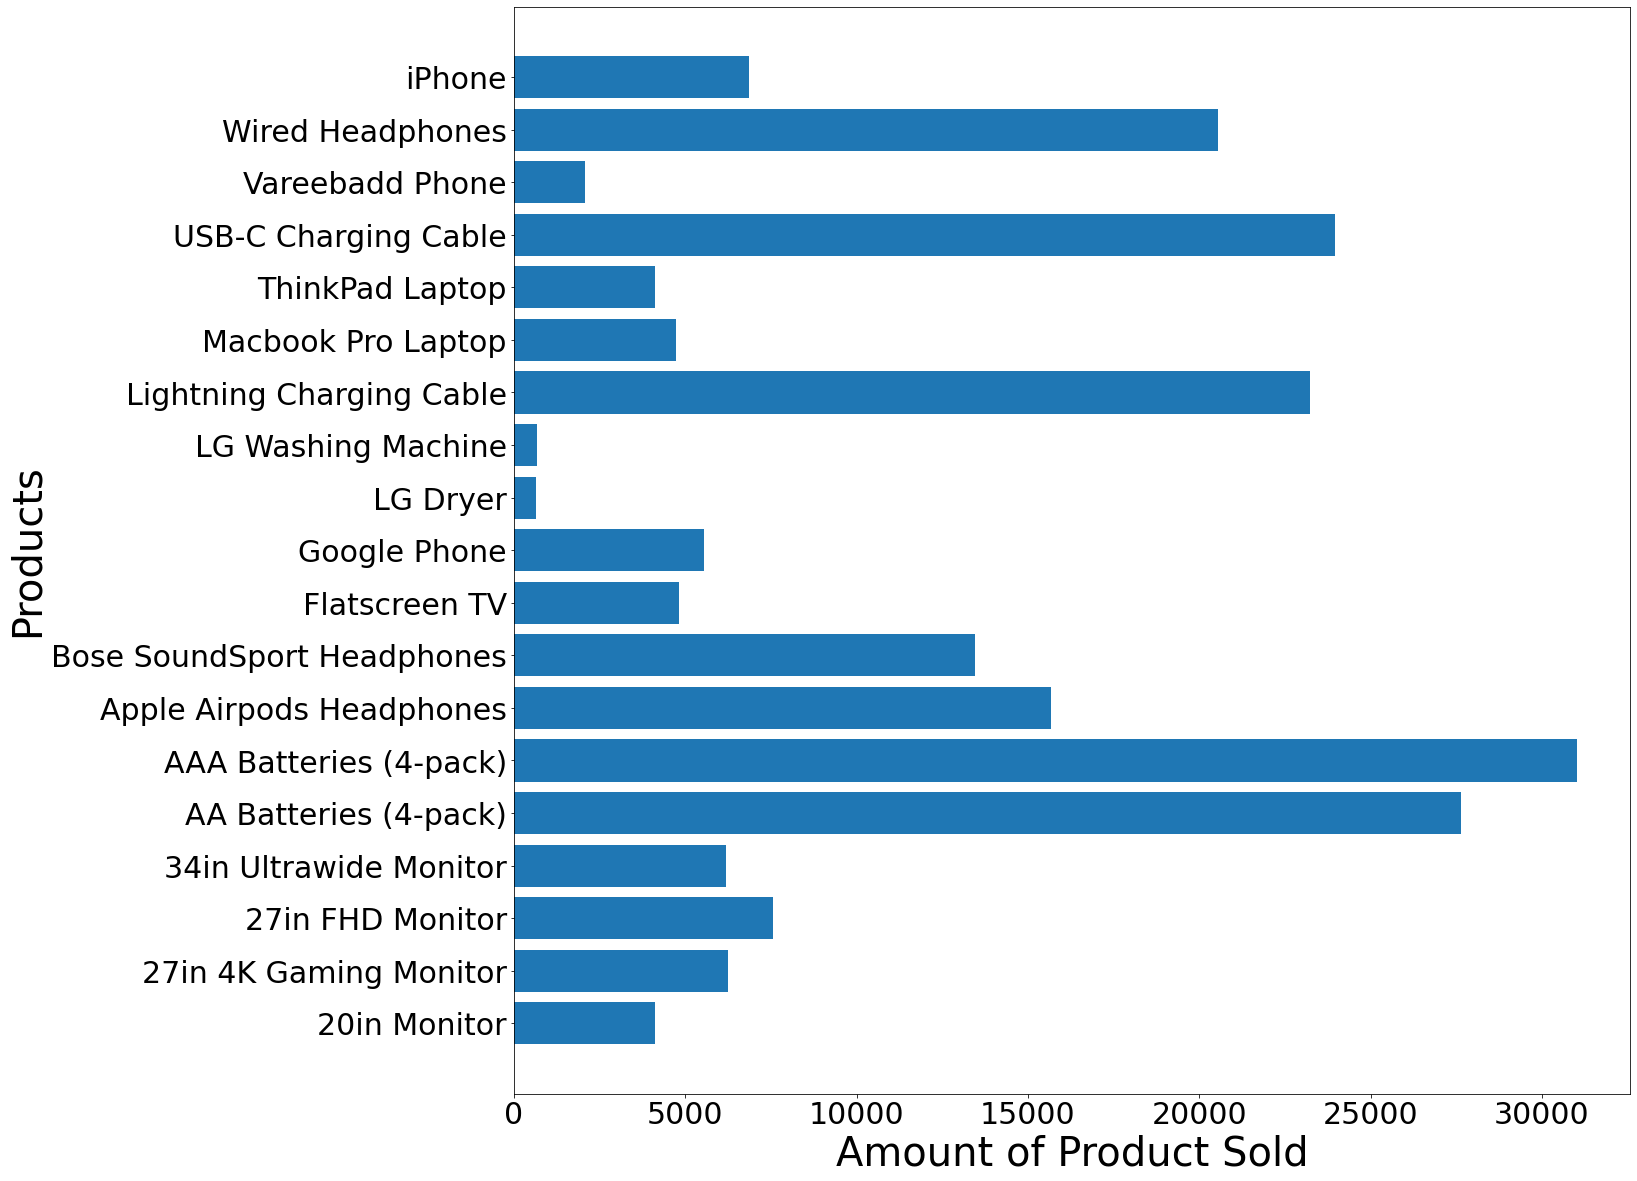

In [196]:
# Visualize the aggregated dataset using the bar chart
import matplotlib.pyplot as plt

# Define X-axis
# The aggregated dataframe's index contain the "Products"
X = product_grouped.index
# Define y-axis
y = product_grouped["Quantity Ordered"]

fig, ax = plt.subplots()
ax.barh(X, y)  # Display the bar chart horizontally
# plt.rcParams["figure.figsize"] = (30,30)
# change the fontsize of the xtick and ytick labels
# plt.rc('xtick', labelsize=30)
# plt.rc('ytick', labelsize=30)
# Define the labels of the two axis
plt.xlabel("Amount of Product Sold", size=40, color="k")
# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
plt.ylabel("Products", size=40, color="k")
ax.plot()
plt.show()

In [220]:
# Question: What is the reason behind the most sold product? Require to prove the hypothesis? 
# Create a dataframe containing the mean-value of each prodcut based on the "Price Each" column
product_avg_price = df_dropna[["Product", "Price Each"]].groupby("Product").mean()
product_avg_price

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


In [223]:
product_avg_price["Price Each"]

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/3156995308.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(X, prices, 'b-', marker='o', color="r", linewidth=3, markersize=15)
C:\Users\CREATI~1\AppData\Local\Temp/ipykernel_10392/3156995308.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X, rotation=90, ha='right')


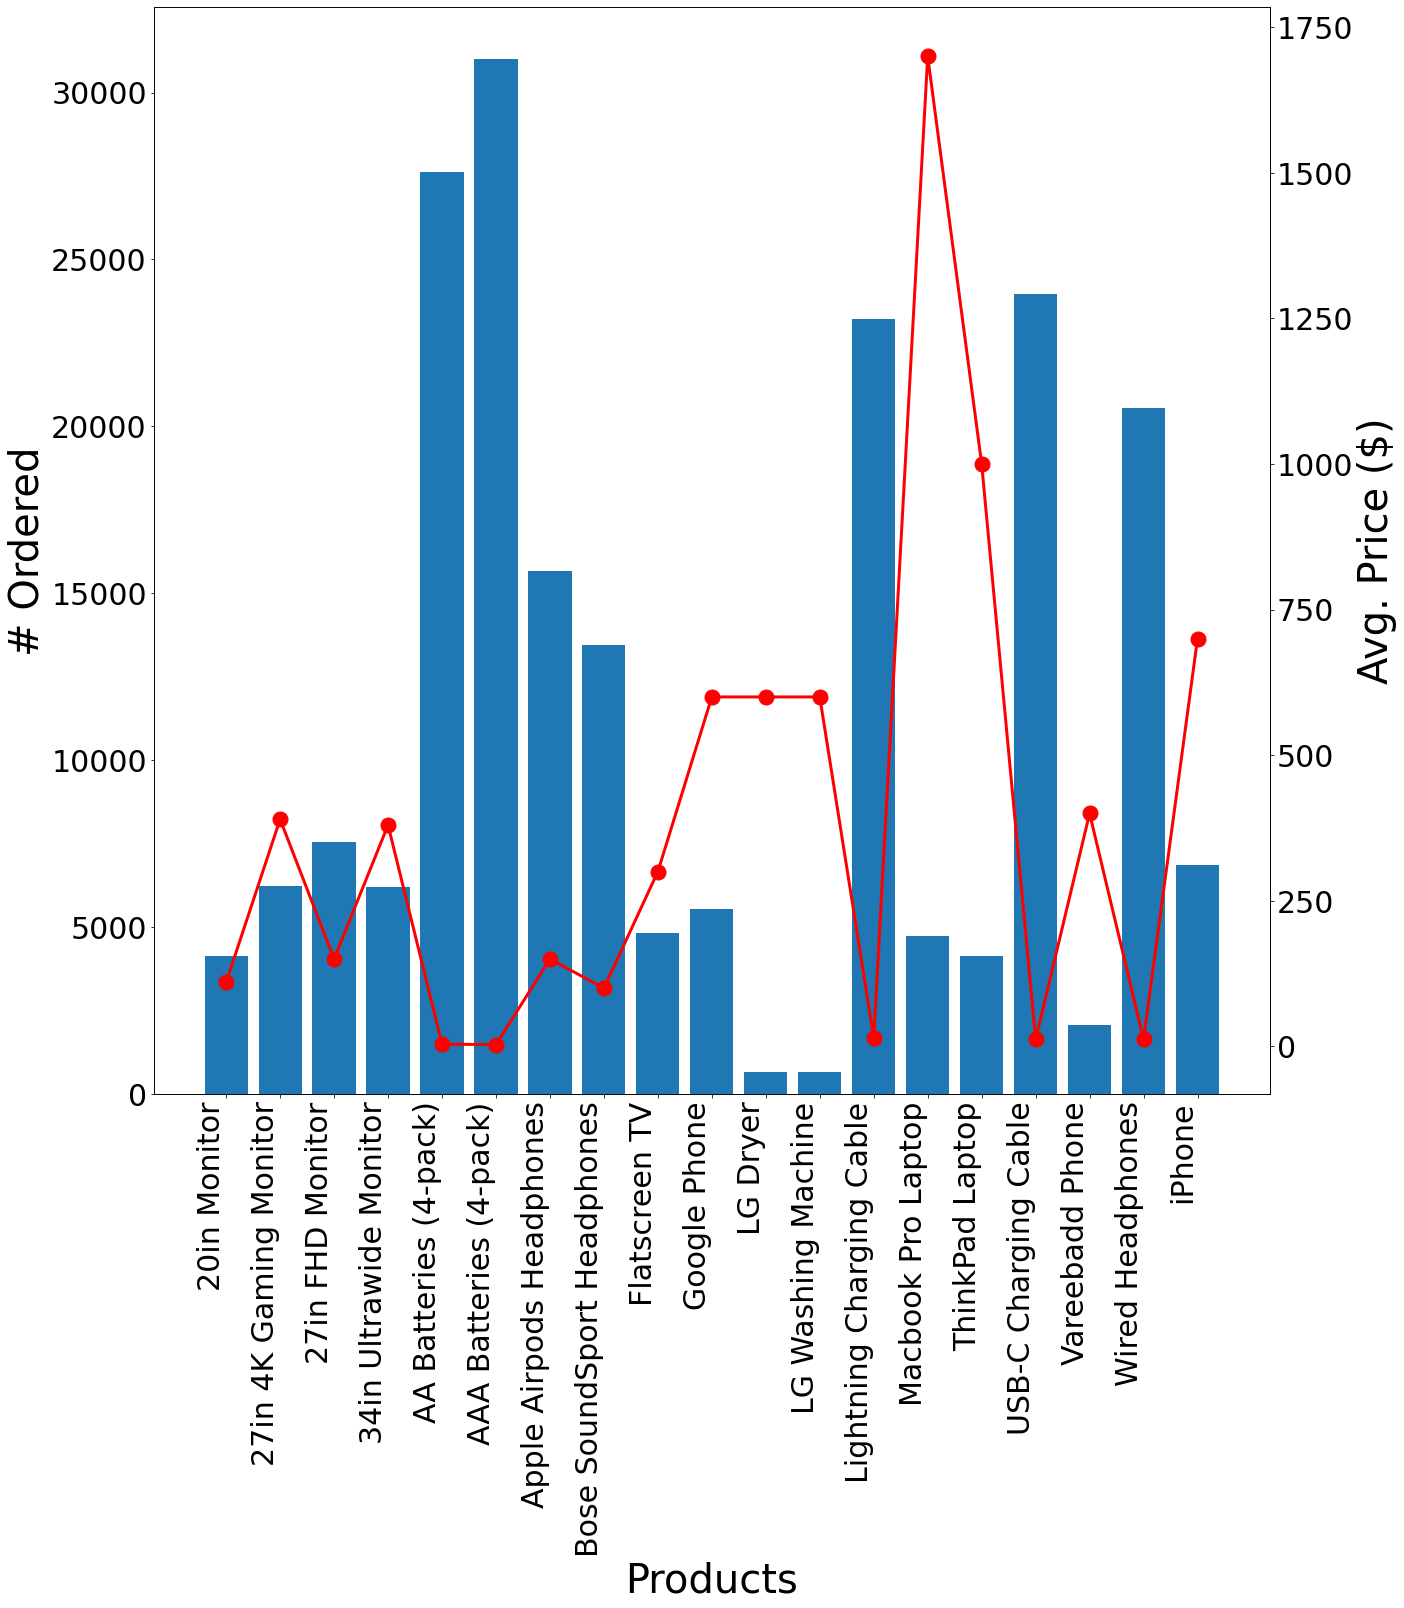

In [249]:
# To prove that the products that are sold the most, we've to overlay the average price of each product in the horizontal-bar graph
# Pass only the "Price Each" series inside the horizontal bar-graph
import matplotlib.pyplot as plt

# Define X-axis
# The aggregated dataframe's index contain the "Products"
X = product_grouped.index
# Define y-axis
y = product_grouped["Quantity Ordered"]
prices = product_avg_price["Price Each"]

fig, ax1 = plt.subplots()
# Overlay the prices as the secondary y-axis
ax2 = ax1.twinx()


ax1.bar(X, y)  # Display the bar chart horizontally
ax2.plot(X, prices, 'b-', marker='o', color="r", linewidth=3, markersize=15)
# plt.rcParams["figure.figsize"] = (30,30)
# change the fontsize of the xtick and ytick labels
# plt.rc('xtick', labelsize=30)
# plt.rc('ytick', labelsize=30)
# Define the labels of the two axis
ax1.set_xlabel("Products", size=40, color="k")
ax1.set_xticklabels(X, rotation=90, ha='right')
# ax1.set_xticks(ax.get_xticks())
# ax1.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
# plt.yticks(rotation=90)
ax1.set_ylabel("# Ordered", size=40, color="k")
ax2.set_ylabel("Avg. Price ($)", size=40, color="k")
# ax.plot()
plt.show()